In [26]:
# import modules to address environment variables
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import api_function
import stock_function
import plot_function


import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime as dt
from datetime import datetime
import time

import requests

In [11]:
df_apple = pd.read_csv('data/apple-daily.csv', index_col='timestamp')
df_apple.head()

,open,high,low,close,volume
timestamp,,,,,
2022-03-21,163.51,166.35,163.015,165.38,89029269
2022-03-18,160.51,164.48,159.760,163.98,122055535
2022-03-17,158.61,161.00,157.630,160.62,75615376
2022-03-16,157.05,160.00,154.460,159.59,102300157
2022-03-15,150.90,155.57,150.380,155.09,92964302


In [12]:
def add_log_returns_column(df, start_date, end_date):
    df.columns = [col.replace(" ", "_").lower() for col in df.columns]

    df.index = pd.to_datetime(df.index)
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask].reset_index()
    df["log_returns"] = np.log(df.close / df.close.shift())
    return df

In [13]:
df_apple = add_log_returns_column(df_apple, '2021-01-01', '2021-12-31')
df_apple

,timestamp,open,high,low,close,volume,log_returns
0,2021-12-31,178.085,179.2300,177.260,177.57,61661433,NaN
1,2021-12-30,179.470,180.5700,178.090,178.20,59773014,0.003542
2,2021-12-29,179.330,180.6300,178.140,179.38,62348931,0.006600
3,2021-12-28,180.160,181.3300,178.530,179.29,79144339,-0.000502
4,2021-12-27,177.085,180.4200,177.070,180.33,74919582,0.005784
...,...,...,...,...,...,...,...
247,2021-01-08,132.430,132.6300,130.230,132.05,105158245,0.023523
248,2021-01-07,128.360,131.6300,127.860,130.92,109578157,-0.008594
249,2021-01-06,127.720,131.0499,126.382,126.60,155087970,-0.033554
250,2021-01-05,128.890,131.7400,128.430,131.01,97664898,0.034241


In [14]:
if 'log_returns' in df_apple.columns:
    print('yes')
else:
    print('no')

yes


In [15]:
def calc_volatility(df, start_date, end_date, trading_day): 
    if 'log_returns' in df.columns:
        return df['log_returns'].std()*trading_day**0.5
    else: 
        df = add_log_returns_column(df, start_date, end_date)
        return df['log_returns'].std()*trading_day**0.5

In [16]:
calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)

0.2500626349151892

Text(0.5, 1.0, 'AAPL volatility: 25.009999999999998%')

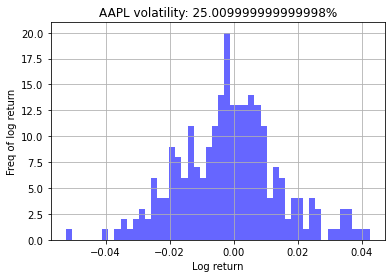

In [17]:
volatility = calc_volatility(df_apple, '2021-01-01', '2021-12-31', 252)
str_vol = str(round(volatility, 4)*100)

fig, ax = plt.subplots()
df_apple['log_returns'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('AAPL volatility: ' + str_vol + '%')

In [18]:
volatility = calc_volatility(df_apple, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(df_apple, x="log_returns", title="AAPL volatility: " + str_vol + "%")

fig.show()


In [19]:
df_microsoft = pd.read_csv('data/microsoft-daily.csv', index_col='timestamp')
df_microsoft.head()

,open,high,low,close,volume
timestamp,,,,,
2022-03-21,298.89,300.14,294.900,299.16,28107855
2022-03-18,295.37,301.00,292.730,300.43,42195837
2022-03-17,293.29,295.61,289.370,295.22,30816633
2022-03-16,289.11,294.57,283.200,294.39,37826329
2022-03-15,280.35,287.82,278.725,287.15,34245085


In [20]:
df_microsoft = add_log_returns_column(df_microsoft, "2021-01-01", "2021-12-31")
df_microsoft


,timestamp,open,high,low,close,volume,log_returns
0,2021-12-31,338.51,339.3550,335.8500,336.32,17772880,NaN
1,2021-12-30,341.91,343.1300,338.8200,339.32,15994471,0.008881
2,2021-12-29,341.30,344.3000,339.6800,341.95,15041956,0.007721
3,2021-12-28,343.15,343.8100,340.3200,341.25,15661467,-0.002049
4,2021-12-27,335.46,342.4800,335.4300,342.45,19947029,0.003510
...,...,...,...,...,...,...,...
247,2021-01-08,218.68,220.5800,217.0261,219.62,22956206,0.009746
248,2021-01-07,214.04,219.3400,213.7100,218.29,27694480,-0.006074
249,2021-01-06,212.17,216.4899,211.9400,212.25,35930653,-0.028060
250,2021-01-05,217.26,218.5200,215.7000,217.90,23822953,0.026271


In [21]:
vm = calc_volatility(df_microsoft, "2021-01-01", "2021-12-31", 252)
vm

0.20940810512984667

In [22]:
type(df_microsoft)

pandas.core.frame.DataFrame

In [23]:
volatility = calc_volatility(df_microsoft, "2021-01-01", "2021-12-31", 252)
str_vol = str(round(volatility, 4) * 100)

fig = px.histogram(
    df_microsoft, x="log_returns", title="Volatility: " + str_vol + "%"
)

fig.show()


In [ ]:
apple_yahoo = pdr.get_data_yahoo('AAPL', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31))

In [ ]:
apple_yahoo_vo = stock_function.calc_volatility(apple_yahoo, "2021-01-01", "2021-12-31", 252)
apple_yahoo_vo

0.25007576053486047

In [ ]:

aapl = web.DataReader(
    "AAPL",
    "av-daily",
    start=datetime(2010, 1, 1),
    end=datetime(2021, 12, 31),
    api_key=os.getenv("x-rapidapi-key"),
)

type(aapl)

pandas.core.frame.DataFrame

In [ ]:
aapl_v = stock_function.calc_volatility(aapl, "2021-01-01", "2021-12-31", 252)
aapl_v

0.2500626349151892

In [ ]:
bitcoin_yahoo = pdr.get_data_yahoo('BTC-USD', dt.datetime(2012, 1, 1), dt.datetime(2021, 12, 31))
print(bitcoin_yahoo.head())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2015-01-01  320.434998  314.002991  320.434998  314.248993   8036550   
2015-01-02  315.838989  313.565002  314.079010  315.032013   7860650   
2015-01-03  315.149994  281.082001  314.846008  281.082001  33054400   
2015-01-04  287.230011  257.612000  281.145996  264.195007  55629100   
2015-01-05  278.341003  265.084015  265.084015  274.473999  43962800   

             Adj Close  
Date                    
2015-01-01  314.248993  
2015-01-02  315.032013  
2015-01-03  281.082001  
2015-01-04  264.195007  
2015-01-05  274.473999  


In [ ]:
type(bitcoin_yahoo)

pandas.core.frame.DataFrame

In [ ]:
bitcoin_yahoo_vo = stock_function.calc_volatility(bitcoin_yahoo, "2021-01-01", "2021-12-31", 252)
bitcoin_yahoo_vo

0.6682564913158537

In [ ]:
df_bitcoin = pd.read_csv('data/bitcoin-daily.csv', index_col='timestamp')
df_bitcoin.head()

,open,high,low,close,volume
timestamp,,,,,
2022-03-21,41265.2659,41548.3907,40506.5318,41006.9671,48166
2022-03-20,42208.2299,42303.0066,40914.4532,41267.8547,38469
2022-03-19,41764.4144,42407.3007,41504.8632,42209.0166,39308
2022-03-18,40928.0314,42348.2912,40137.4168,41764.1391,52652
2022-03-17,41119.5832,41450.5255,40509.1084,40928.8143,53008


In [ ]:
df_bitcoin_v = calc_volatility(df_bitcoin, "2021-01-01", "2021-12-31", 252)
df_bitcoin_v

0.6662024957612799

In [ ]:
def get_df_stock_daily(symbol, start_date='2012-01-01', end_date='2021-12-31'):
    return web.DataReader(
        symbol,
        "av-daily",
        start=datetime.strptime(start_date, "%Y-%m-%d").date(),
        end=datetime.strptime(end_date, "%Y-%m-%d").date(),
        api_key=os.getenv("x-rapidapi-key"),
    )

In [ ]:
alpha_bit = api_function.get_df_stock_daily('BTCUSD')
alpha_bit

,open,high,low,close,volume
2012-01-01,4.3900,4.5800,4.3900,4.5800,95
2012-01-02,4.5800,5.0000,4.5800,5.0000,21
2012-01-03,5.0000,5.0000,5.0000,5.0000,19
2012-01-04,5.3200,5.3200,5.1400,5.2900,88
2012-01-05,4.9300,5.5700,4.9300,5.5700,107
...,...,...,...,...,...
2021-12-27,50786.1846,52091.4642,50460.6439,50704.3271,44366
2021-12-28,50707.7016,50709.3482,47311.1945,47544.8287,63873
2021-12-29,47544.1863,48143.8484,46138.0002,46466.5142,55828
2021-12-30,46467.8409,47912.7227,45944.4800,47123.4561,57111


In [ ]:
alpha_bit_v = calc_volatility(alpha_bit, "2021-01-01", "2021-12-31", 252)
alpha_bit_v

0.6662024957612798

In [ ]:
def get_all_focused_stocks(start_date="2012-01-01", end_date="2021-12-31"):
    symbols = ["AAPL", "BTCUSD", "FB", "GOOG", "MSFT", "TSLA"]

    df_aapl = api_function.get_df_stock_daily("AAPL", start_date, end_date)
    # time.sleep(15)
    df_btcusd = api_function.get_df_stock_daily("BTCUSD", start_date, end_date)
    # time.sleep(15)
    df_fb = api_function.get_df_stock_daily("FB", start_date, end_date)
    # time.sleep(15)
    df_goog = api_function.get_df_stock_daily("GOOG", start_date, end_date)
    # time.sleep(15)
    df_msft = api_function.get_df_stock_daily("MSFT", start_date, end_date)
    # time.sleep(15)
    df_tsla = api_function.get_df_stock_daily("TSLA", start_date, end_date)

    return df_aapl, df_btcusd, df_fb, df_goog, df_msft, df_tsla


df_aapl, df_btcusd, df_fb, df_goog, df_msft, df_tsla = get_all_focused_stocks(
    start_date="2012-01-01", end_date="2021-12-31"
)


In [28]:
start_date="2012-01-01"
end_date="2021-12-31"
df_aapl = api_function.get_df_stock_daily("AAPL", start_date, end_date)

KeyboardInterrupt: 